In [1]:
# Import Python libraries
import numpy as np    # numpy is the fundamental package for scientific computing with Python, such linear algebra, array...
import matplotlib.pyplot as plt      # matplotlib is a Python 2D plotting library which produces publication quality figures.

In [2]:
class neuralNet:
    
    def __init__(self, input_dim ,output_dim):
        hidden_dim = 20
        input_dim += 1
        hidden_dim += 1
        
        self.theta1 = np.random.randn(input_dim , hidden_dim)      
        
        self.theta2 = np.random.randn(hidden_dim, output_dim) 
    
    def fit(self,dataInput,dataOutput,alpha = 0.01):
        for epoch in range(0,5):
            for row in range(len(dataInput)):
                truthValue = dataOutput[row]
                data = dataInput[row]
                bias = [-1]
                data = np.append(data,bias)
                product1 = np.matmul(data,self.theta1)
                tanh1 = np.tanh(product1)
                product2 = np.matmul(tanh1,self.theta2)
                exp_p2 = np.exp(-(product2))
                sigmoid = 1/(1+exp_p2)

                #backward
                dw2 = (truthValue - sigmoid)*sigmoid*(1-sigmoid)*tanh1

                dw2 = np.transpose([dw2])
                dummy = (truthValue - sigmoid)*sigmoid*(1-sigmoid)
                dw1 = (truthValue - sigmoid)*sigmoid*(1-sigmoid)*dummy*(1-np.tanh(product1)**2)*np.transpose([data])
                self.theta1 += dw1*alpha
                self.theta2 += dw2*alpha

                #dw2 = (data_output - z)*z*(1-z)*y
                #dw1 = dw2*weight2*(1-np.tanh(p1)**2)*data_input
        
    def predict(self,dataInput):
        
        """Makes a prediction based on current model parameters.

        args:
            X: Data array
            Sigmoid

        returns:
            predictions: array of predicted labels"""

        #predictions = []
        
#         for row in range(len(dataInput)):
#             data = dataInput[row]
#             bias = [-1]
#             data = np.append(data,bias)
#             product1 = np.matmul(data,self.theta1)
#             tanh1 = np.tanh(product1)
#             product2 = np.matmul(tanh1,self.theta2)
#             exp_p2 = np.exp(-(product2))
#             sigmoid = 1/(1+exp_p2)
#             predictions.append(sigmoid)
            
            
#         print(np.shape(predictions))
#         return predictions

        predictions=[]
        for row in range(len(dataInput)):
            data = dataInput[row]
            data=np.append(data,[-1])
            self.layer1 = np.tanh(np.dot(data,self.theta1))
            self.output = 1/(1+np.exp(-np.dot(self.layer1,self.theta2)))
            predictions.append(np.round(self.output,0))
        return np.array(predictions)
              
        
    
        

In [3]:
def computation(float_num):
    float_num = round(float(float_num))
    return float_num

In [4]:
def plot_decision_boundary(model, X, Y):
    
        """Function to print the decision boundary given by model.
    
        args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
        """
    
        x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
        grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
        Z = model.predict(grid_coordinates)
        Z = Z.reshape(x1_array.shape)
        plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
        plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.bwr)
        plt.show()

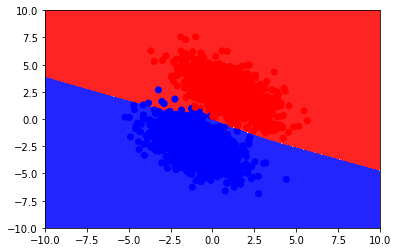

In [5]:
# Read data
X = np.genfromtxt('DATA/data_LinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
Y = np.genfromtxt('DATA/data_LinearY.csv', delimiter=',').astype(np.int64)

net = neuralNet(2,1)
net.fit(X,Y)
#net.predict(X)
plot_decision_boundary(net,X,Y)

In [6]:
#7. compute accuracy and confusion matrix
acc = 0
y_pred = net.predict(X)
con_mat = np.zeros((2, 2))
for i in range(len(y_pred)):
    if Y[i] == computation(y_pred[i]):
        if Y[i]==round(float(y_pred[i])):
            acc+=1
        if Y[i]==1:
            con_mat[0][0]+=1
        else:
            con_mat[1][1]+=1
    else:
        if Y[i]==1:
            con_mat[0][1]+=1
        else:
            con_mat[1][0]+=1
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  1.0
CONFUSION MATRIX: 
 [[ 1000.     0.]
 [   11.   989.]]


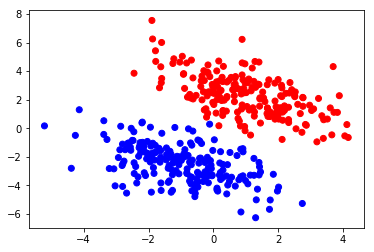

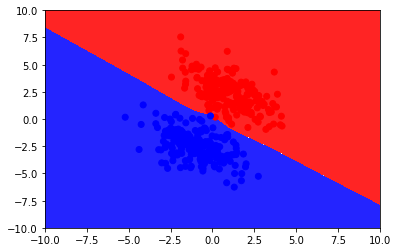

ACCURACY:  1.0
CONFUSION MATRIX: 
 [[ 197.    0.]
 [   0.  203.]]


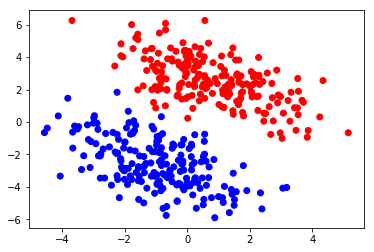

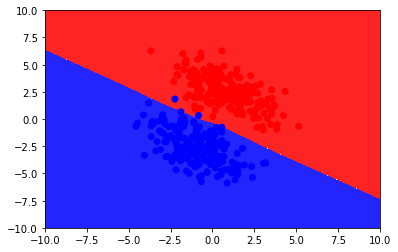

ACCURACY:  0.995
CONFUSION MATRIX: 
 [[ 202.    0.]
 [   2.  196.]]


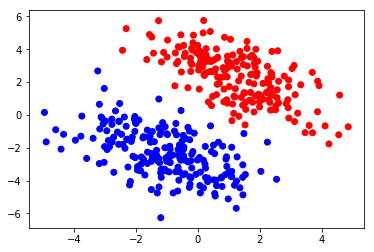

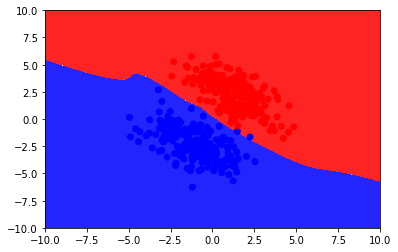

ACCURACY:  0.995
CONFUSION MATRIX: 
 [[ 195.    0.]
 [   2.  203.]]


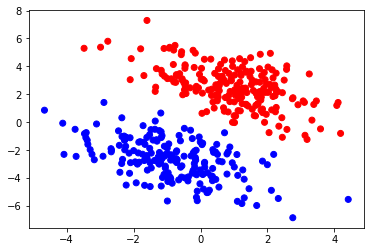

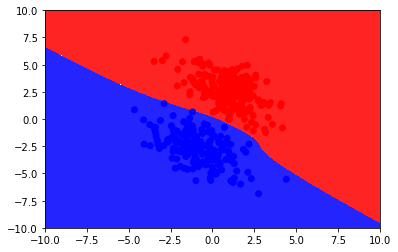

ACCURACY:  1.0
CONFUSION MATRIX: 
 [[ 208.    0.]
 [   0.  192.]]


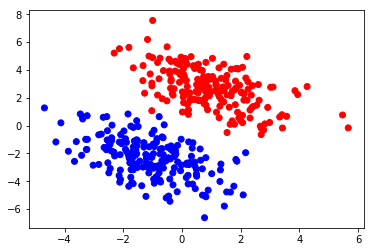

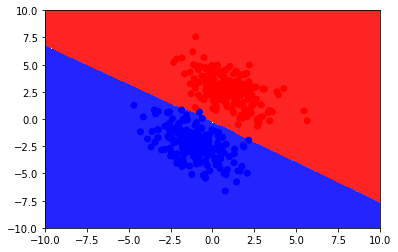

ACCURACY:  0.9975
CONFUSION MATRIX: 
 [[ 198.    0.]
 [   1.  201.]]


In [7]:
#1. Load data
X = np.genfromtxt('DATA/data_LinearX.csv', delimiter=',') #https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
y = np.genfromtxt('DATA/data_LinearY.csv', delimiter=',').astype(np.int64)

X1=X[0:400]
X2=X[400:800]
X3=X[800:1200]
X4=X[1200:1600]
X5=X[1600:len(X)]
y1=y[0:400]
y2=y[400:800]
y3=y[800:1200]
y4=y[1200:1600]
y5=y[1600:len(y)]

ys1=y1.reshape(400,1)
ys2=y2.reshape(400,1)
ys3=y3.reshape(400,1)
ys4=y4.reshape(400,1)
ys5=y5.reshape(400,1)

weight1=np.zeros((2,20))
weight2=np.zeros((20,1))

XArray=[X1,X2,X3,X4,X5]
YArray=[y1,y2,y3,y4,y5]
YreshapedArray=[ys1,ys2,ys3,ys4,ys5]
weight1Array=[weight1,weight1,weight1,weight1]
weight2Array=[weight2,weight2,weight2,weight2]

for run in range(5):
    if(run<=4):
        plt.scatter(XArray[run][:,0], XArray[run][:,1], c=YArray[run], cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
        plt.show()
        N= neuralNet(np.shape(XArray[run])[1],1)
        N.fit(XArray[run],YArray[run],alpha=0.1)

        plot_decision_boundary(N,XArray[run],YArray[run]) 
        
        acc = 0
        y_pred = N.predict(XArray[run])
        con_mat = np.zeros((2,2))
        for i in range(len(y_pred)):
            if YArray[run][i]==round(float(y_pred[i])):
                acc+=1
                if YArray[run][i]==1:
                    con_mat[0][0]+=1
                else:
                    con_mat[1][1]+=1
            else:
                if YArray[run][i]==1:
                    con_mat[0][1]+=1
                else:
                    con_mat[1][0]+=1

        acc = acc/len(y_pred)

        print ('ACCURACY: ', acc)
        print ('CONFUSION MATRIX: \n', con_mat)
    else:
        plt.scatter(XArray[run][:,0], XArray[run][:,1], c=YArray[run], cmap=plt.cm.bwr) #http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
        plt.show()
        N= neuralNet(np.shape(XArray[run])[1],1)
        
        plot_decision_boundary(N,XArray[run],YArray[run]) 
        
        acc = 0
        y_pred = N.predict(XArray[run])
        con_mat = np.zeros((2,2))
        for i in range(len(y_pred)):
            if YArray[run][i]==round(float(y_pred[i])):
                acc+=1
                if YArray[run][i]==1:
                    con_mat[0][0]+=1
                else:
                    con_mat[1][1]+=1
            else:
                if YArray[run][i]==1:
                    con_mat[0][1]+=1
                else:
                    con_mat[1][0]+=1

        acc = acc/len(y_pred)

        print ('ACCURACY: ', acc)
        print ('CONFUSION MATRIX: \n', con_mat)